In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# создадим 10 случайных наблюдений, где y линейно зависит от x
x_1 = np.arange(1,11)
y = 2 * x_1 + np.random.randn(10)*2
X = pd.DataFrame({'x':x_1, 'y':y})
X.head(3)

,x,y
0,1,-0.061139
1,2,3.218663
2,3,4.294068


In [3]:
# создадим вектор со средними значениями по осям x и y
# средние значения пригодятся для преобразования компонент в матрицу исходных значений
mean_val_vect = (X['x'].mean(), X['y'].mean())
mean_val_vect

(5.5, 9.87934944074884)

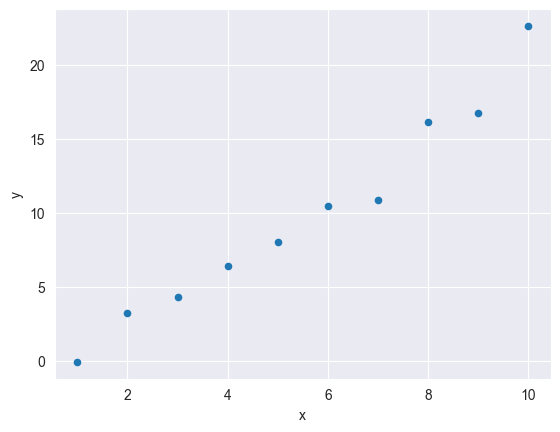

In [4]:
X.plot(kind='scatter', x='x', y='y')
plt.show()

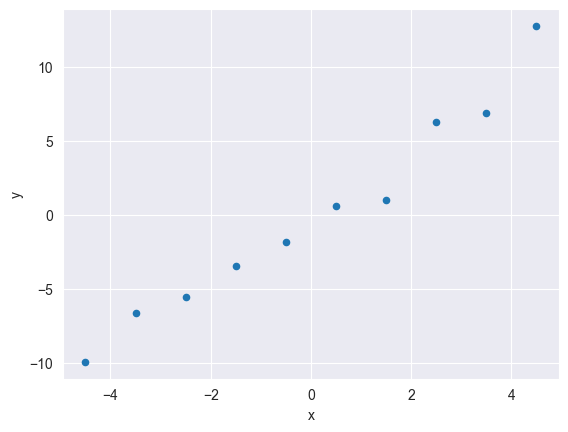

In [5]:
# нормализуем значения со средним равным 0, оставив первоначальную дисперсию
Z = pd.DataFrame()
Z['x'] = X['x'] - X['x'].mean()
Z['y'] = X['y'] - X['y'].mean()
Z.plot(kind='scatter', x='x', y='y')
plt.show()

In [6]:
# сделаем преобразование в более подходящий формат
Z = Z.to_numpy()
Z_T = Z.T
Z_T

array([[-4.5       , -3.5       , -2.5       , -1.5       , -0.5       ,
         0.5       ,  1.5       ,  2.5       ,  3.5       ,  4.5       ],
       [-9.94048875, -6.66068681, -5.5852817 , -3.48125062, -1.81257067,
         0.57576052,  0.98677207,  6.27152377,  6.89365722, 12.75256496]])

In [7]:
# найдем матричное произведение матриц Z и Z транспонированная
ZtZ = (Z.T.dot(Z))
# и число степеней свободы
df = len(x_1) - 1
ZtZ

array([[ 82.5       , 187.09715907],
       [187.09715907, 440.56560782]])

In [8]:
# найдем ковариационную матрицу
cov_matrix = ZtZ / df
var_sum = cov_matrix[0,0] + cov_matrix[1,1]
cov_matrix

array([[ 9.16666667, 20.78857323],
       [20.78857323, 48.9517342 ]])

In [9]:
print("Variance of X: ", cov_matrix[0,0])
print("Variance of Y: ", cov_matrix[1,1])
print("Covariance X and Y: ", cov_matrix[0,1])

Variance of X:  9.166666666666666
Variance of Y:  48.95173420187243
Covariance X and Y:  20.788573230538162


In [10]:
# готовый метод numpy cov()
np.cov(Z_T)

array([[ 9.16666667, 20.78857323],
       [20.78857323, 48.9517342 ]])

In [11]:
# найдем собственные значения и собственную матрицу для ковариационной матрицы
eigenvalues, eigenvector = np.linalg.eig(cov_matrix)
print('eigenvalues: ', eigenvalues)
print('eigenvector: ', eigenvector)

eigenvalues:  [ 0.28633689 57.83206398]
eigenvector:  [[-0.91960981 -0.39283304]
 [ 0.39283304 -0.91960981]]


In [12]:
# используем второй вектор так, как второе собственное значение больше первого
vecs = -eigenvector[:, 1]
X_reduced = vecs.dot(Z.T)
X_reduced[:3]

array([-10.90911965,  -7.50014857,  -6.11836244])

In [13]:
# восстановим случайный элемент
n = 9 # номер элемента случайной величины
X_restored = vecs.dot(X_reduced[n]) + mean_val_vect
print('Restored: ', X_restored)
print('Original: ', list(X.loc[n]))

Restored:  [10.80133391 22.2896057 ]
Original:  [10.0, 22.6319143972007]


In [14]:
# восстановим матрицу первоначальных значений
X_restored = X_reduced.reshape(len(X_reduced), 1).dot(vecs.reshape(1, len(vecs))) + mean_val_vect

In [15]:
# сравним и найдем разницу
total = pd.concat([X, pd.DataFrame(X_restored)], axis=1)
total['diff_x'] = (total['x'] - total[0]) ** 2
total['diff_y'] = (total['y'] - total[1]) ** 2
total.loc['Total'] = np.sqrt(total.sum())
total.head(5)

,x,y,0,1,diff_x,diff_y
0,1.0,-0.061139,1.214537,-0.152784,0.046026,0.008399
1,2.0,3.218663,2.553694,2.982139,0.306577,0.055943
2,3.0,4.294068,3.096505,4.252843,0.009313,0.001699
3,4.0,6.398099,4.010911,6.393438,0.000119,0.000022
4,5.0,8.066779,4.768044,8.165864,0.053803,0.009818


In [16]:
# инициируем готовый метод sklearn, с одной компонентой
pca = PCA(n_components=1)

In [17]:
X_sklearn_reduced = pca.fit_transform(X)

In [18]:
# сравним аналитическое и sklearn решения
compare = pd.DataFrame()
compare['Manual'] = X_reduced
compare['Sklearn'] = X_sklearn_reduced
compare.head(5)

,Manual,Sklearn
0,-10.909120,-10.909120
1,-7.500149,-7.500149
2,-6.118362,-6.118362
3,-3.790642,-3.790642
4,-1.863274,-1.863274


In [19]:
# сравним ключевые характеристики
print('Mean vector: ', pca.mean_, mean_val_vect)
print('Projection: ', pca.components_, vecs)
print('Explained variance: ', pca.explained_variance_, eigenvalues[1])
print('Explained variance ratio: ', pca.explained_variance_ratio_, eigenvalues[1] / var_sum)

Mean vector:  [5.5        9.87934944] (5.5, 9.87934944074884)
Projection:  [[0.39283304 0.91960981]] [0.39283304 0.91960981]
Explained variance:  [57.83206398] 57.832063980615935
Explained variance ratio:  [0.99507321] 0.9950732146162995
